In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
from PIL import Image
import statsmodels.api as sm
import seaborn as sns
sns.set_context("poster")
sns.set_style('darkgrid')
#context_lst = ["paper", "notebook", "talk", "poster"]
import datetime

In [2]:
AAFremoved = pd.read_csv("merged_analysis_result170104_231839.csv", encoding="shift-jis")
#ベースラインより下がったピークは考慮しない
AAFremoved["Max Response (%)"] = AAFremoved["p_max"].apply(lambda F: F if F>0 else np.nan)

#p_peak_appearedは正規ピークの目視判定結果
#ピークは有るものの誤ったピークframeを拾っている場合はp_remarkに文字が書き込まれているため、
#これを正しく判定したはずの解析結果ではこのフラグを書き換えた列を追加する
AAFremoved["p_peak_appeared_repaired"] = AAFremoved["p_remark"].apply(lambda data: isinstance(data, str)) | AAFremoved["p_peak_appeared"]

AAFremoved["p_max"] = AAFremoved["Max Response (%)"]
AAFremoved["Stimulation Voltage (V)"] = AAFremoved["voltage"]
AAFremoved["Peak Latency (s)"] = AAFremoved["p_peak_latency"]
AAFremoved["duration (s)"] = AAFremoved["p_duration"]

Ref = pd.read_csv("./../../SoundResponseReference/analysis_result161227_110603.csv", encoding="shift-jis")

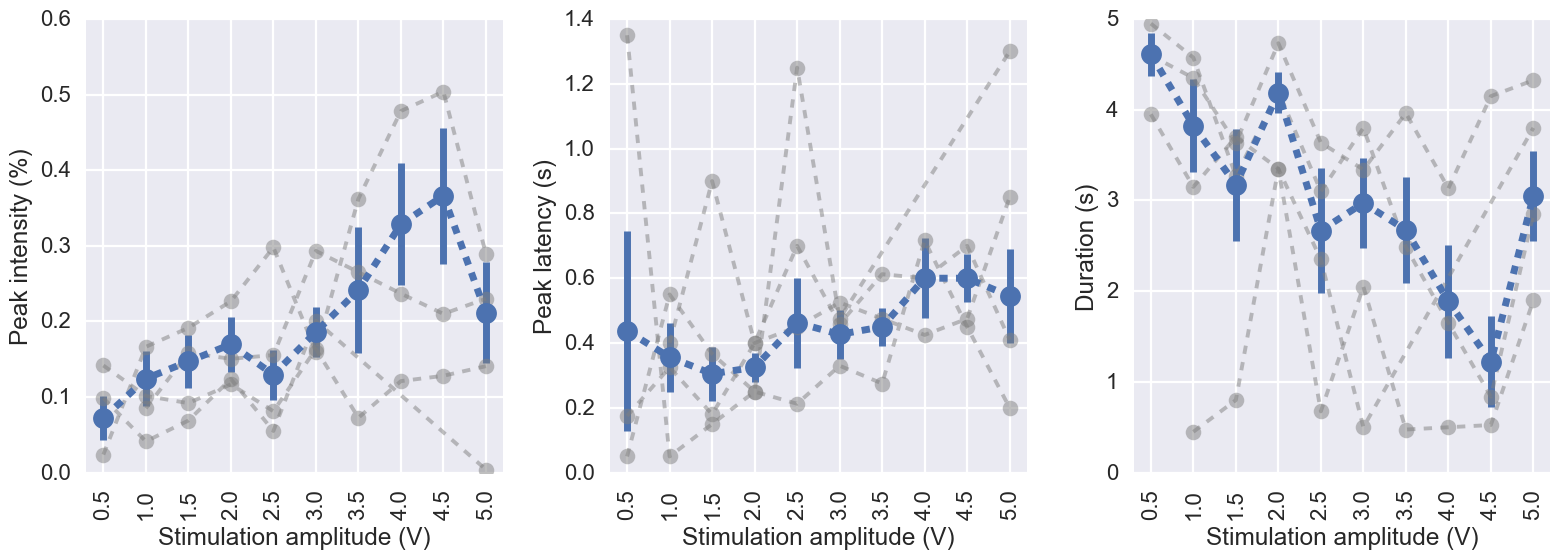

In [4]:
# 4/8 8/9 9/28 9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークチェック済み->誤認識分の補正も完了
#論文へ使用予定

date_list = ["4月8日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak intensity (%)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak latency (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.tight_layout()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-v01-8f50.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-v01-8f50.pdf", dpi=300)

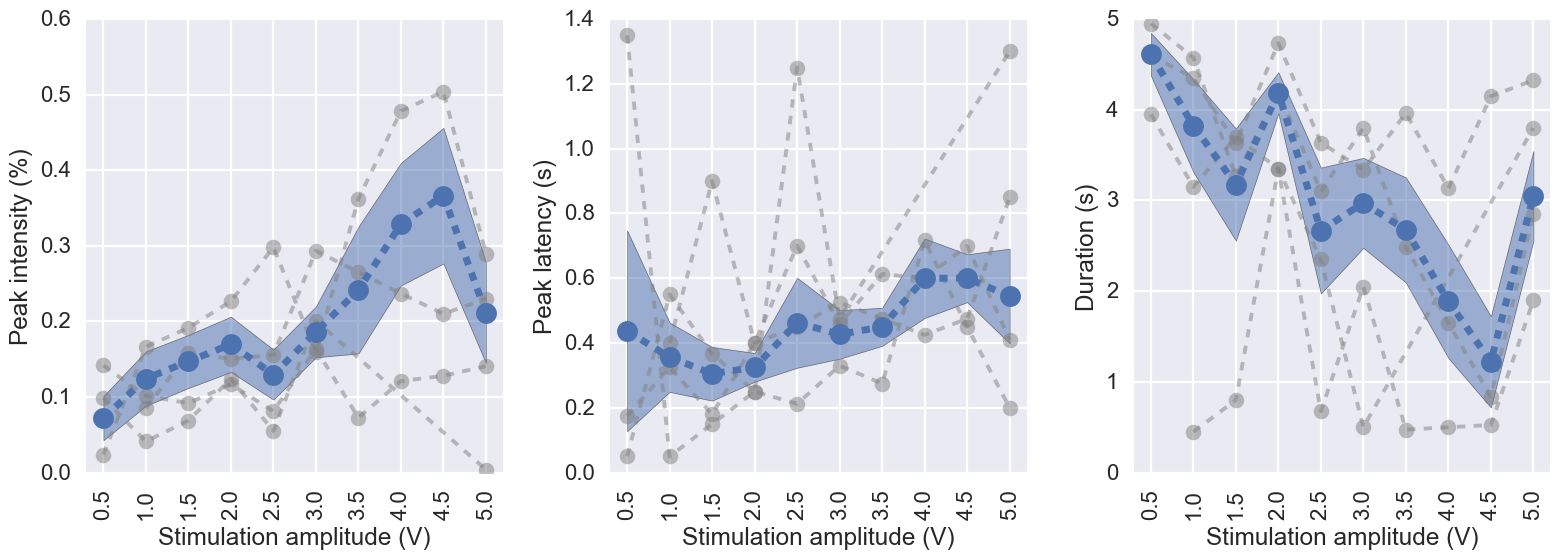

In [5]:
# 4/8 8/9 9/28 9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークチェック済み->誤認識分の補正も完了
#論文へ使用予定

date_list = ["4月8日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.5,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
intensity_x = np.array(grouped_MaxResponse_f.mean().index)
intensity_err = np.array(grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()).values)
intensity_mean = np.array(grouped_MaxResponse_f.mean().values)
plt.fill_between(intensity_x, intensity_mean-intensity_err, intensity_mean+intensity_err, alpha=0.5)
grouped_MaxResponse_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--")
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak intensity (%)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
latency_x = np.array(grouped_latency_f.mean().index)
latency_err = np.array(grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()).values)
latency_mean = np.array(grouped_latency_f.mean().values)
plt.fill_between(latency_x, latency_mean-latency_err, latency_mean+latency_err, alpha=0.5)
grouped_latency_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--")
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak latency (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
duration_x = np.array(grouped_duration_f.mean().index)
duration_err = np.array(grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()).values)
duration_mean = np.array(grouped_duration_f.mean().values)
plt.fill_between(duration_x, duration_mean-duration_err, duration_mean+duration_err, alpha=0.5)
grouped_duration_f.mean().plot(linewidth="5",markersize="15",marker="o",linestyle="--")
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.tight_layout()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-shading-v01-8f50.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-shading-v01-8f50.pdf", dpi=300)

In [12]:
date_list = ["4月8日","8月9日","9月28日","9月29日"]
AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True").groupby(AAFremoved["Stimulation Voltage (V)"])["Max Response (%)"].count()

Stimulation Voltage (V)
0.5     4
1.0     8
1.5     8
2.0     7
2.5     7
3.0    14
3.5     8
4.0     8
4.5     7
5.0     9
Name: Max Response (%), dtype: int64

In [11]:
pd.DataFrame([intensity_mean,intensity_err, latency_mean,latency_err, duration_mean,duration_err], 
             columns=duration_x, index=(["Peak intensity[%]", "i_SEM", "Peak latency[s]", "l_SEM", "Duration[s]", "d_SEM"])).T

,Peak intensity[%],i_SEM,Peak latency[s],l_SEM,Duration[s],d_SEM
0.5,0.072027,0.029226,0.437500,0.309822,4.612500,0.235739
1.0,0.124372,0.035964,0.356250,0.107087,3.825000,0.511912
1.5,0.147110,0.035139,0.305000,0.082815,3.175000,0.618163
2.0,0.169729,0.036633,0.325000,0.044320,4.187500,0.226138
2.5,0.129644,0.033092,0.462500,0.138793,2.668750,0.693975
3.0,0.186121,0.033575,0.426667,0.075098,2.973333,0.495981
3.5,0.241443,0.083816,0.450000,0.058689,2.675000,0.579188
4.0,0.328622,0.081044,0.600000,0.122758,1.888889,0.625210
4.5,0.366320,0.089767,0.600000,0.074001,1.221429,0.503187
5.0,0.211525,0.066643,0.545000,0.146335,3.050000,0.496264


In [13]:
date_list = ["4月8日","8月9日","9月28日","9月29日"]
AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"]

2      0.085128
3      0.158185
4      0.150585
5      0.128416
6      0.351919
7      0.265149
8      0.202876
9      0.154278
10     0.171389
16     0.182551
17     0.234755
18          NaN
19     0.270762
20     0.265702
21     0.288714
81     0.170975
82     0.230846
84     0.098630
85     0.041303
86     0.068881
87     0.123913
88     0.055077
93     0.004060
95     0.291005
99     0.174404
100         NaN
101         NaN
102    0.075447
103    0.036846
104         NaN
         ...   
161    0.754196
162    0.452313
164    0.028950
165    0.284399
166         NaN
167    0.348542
169    0.316617
170    0.600949
171    0.788612
172    0.507030
173    0.057636
176    0.282456
177    0.035999
184    0.051655
186    0.018819
187    0.041218
188    0.210911
189    0.133348
191    0.257125
192    0.082830
193    0.538741
194    0.544959
195         NaN
199    0.232033
200    0.198148
202    0.030527
203    0.154487
204    0.332327
205    0.209976
206    0.596322
Name: Max Response (%), 

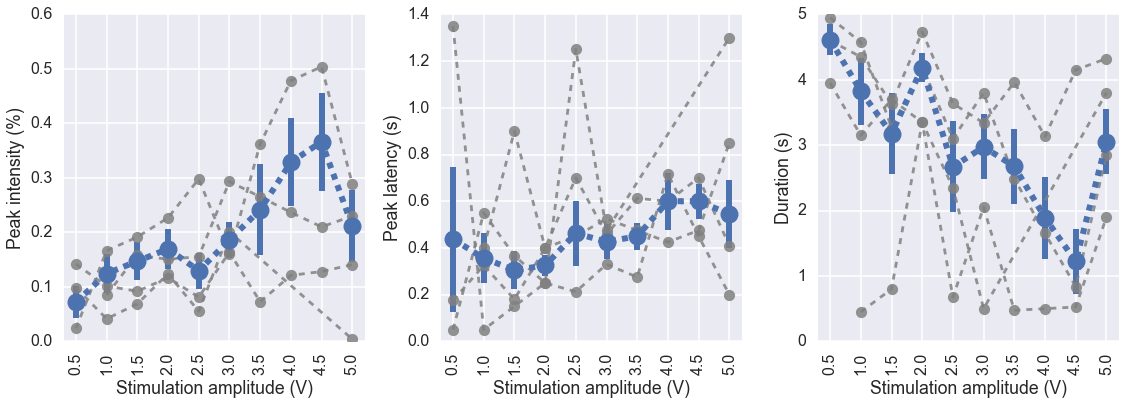

In [10]:
# 4/8 8/9 9/28 9/29 8f<=frame<=50f 0.5s(onset)<=time<=2.5s(onsetから2s) <-onset以降かつ右肩上がりの信号の検出を除外するため
#正規ピークチェック済み->誤認識分の補正も完了
#論文へ使用予定

date_list = ["4月8日","8月9日","9月28日","9月29日"]
plt.figure(figsize=(16,6))

for date in date_list:
    tmp = None
    tmp = AAFremoved[AAFremoved["date"]==date]
    
    try:
        plt.subplot(131)
        tmp_MaxResponse_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_MaxResponse_f.mean().plot(color="gray",alpha=0.85,marker="o",linestyle="--")

        plt.subplot(132)
        tmp_latency_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_latency_f.mean().plot(color="gray",alpha=0.85,marker="o",linestyle="--")

        plt.subplot(133)
        tmp_duration_f = tmp.query("voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(tmp["Stimulation Voltage (V)"])
        tmp_duration_f.mean().plot(color="gray",alpha=0.85,marker="o",linestyle="--")
    except TypeError:
        print(date)


plt.subplot(131)
grouped_MaxResponse_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Max Response (%)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_MaxResponse_f.mean().plot(linewidth="6",markersize="18",marker="o",linestyle="--", yerr=grouped_MaxResponse_f.std()/np.sqrt(grouped_MaxResponse_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak intensity (%)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(132)
grouped_latency_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["Peak Latency (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_latency_f.mean().plot(linewidth="6",markersize="18",marker="o",linestyle="--", yerr=grouped_latency_f.std()/np.sqrt(grouped_latency_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Peak latency (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.subplot(133)
grouped_duration_f = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired == True")["duration (s)"].groupby(AAFremoved["Stimulation Voltage (V)"])
grouped_duration_f.mean().plot(linewidth="6",markersize="18",marker="o",linestyle="--", yerr=grouped_duration_f.std()/np.sqrt(grouped_duration_f.count()))
plt.xlim([0.3,5.2])
plt.xticks([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0], rotation="vertical")
plt.ylabel("Duration (s)")
plt.xlabel("Stimulation amplitude (V)")

plt.tight_layout()
#plt.savefig("AAFremoved-processed.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-Bold-v01-8f50.png", dpi=300)
plt.savefig("merged-0408_0809_0928_0929-checked-repaired-Bold-v01-8f50.pdf", dpi=300)

In [12]:
grouped_latency_f_2 = AAFremoved.query("date in @date_list & voltage > 0.1 & 8 < p_frame & p_frame < 50 & p_peak_appeared_repaired== True")["Peak Latency (s)"]
latency_x_2 = np.array(grouped_latency_f_2.mean())
latency_err_2 = np.array(grouped_latency_f_2.std()/np.sqrt(grouped_latency_f_2.count()))
latency_mean_2 = np.array(grouped_latency_f_2.mean())
print("AAF mean +/- SEM : {} +/- {}".format(latency_mean_2,latency_err_2 ))

AAF mean +/- SEM : 0.4483146067415729 +/- 0.03427761591603233
